## COUNTRY GDP ANALYSIS
This workbook analyses yearly GDP country-wise.

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import opendatasets as od

Pull inputs from github & read in as dataframe.

In [247]:
url="https://raw.githubusercontent.com/GeeksforgeeksDS/Data-Analysis-with-Python-GFG/refs/heads/main/27.%20GDP%20Analysis%20-%20Assignment/gdp.csv"
gdp_df = pd.read_csv(url)

Display the first few entries of the dataframe to see how it looks like.

In [248]:
gdp_df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [249]:
gdp_df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

The above info indicates that there exists 11507 entries with 256 unique countries of which Zimbabwe has the most number of entries with 57.

### CHECK DATA FOR MISSING VALUES, VIEW SUMMARY STATISTICS
Presence of missing values is looked into & summary statistics computed to obtain overall analysis.

In [250]:
gdp_df.describe()

,Year,Value
count,11507.000000,1.150700e+04
mean,1991.265230,1.005972e+12
std,15.886648,4.533056e+12
min,1960.000000,8.824448e+06
25%,1978.000000,2.056874e+09
50%,1993.000000,1.436880e+10
75%,2005.000000,1.796394e+11
max,2016.000000,7.904923e+13


Above info indicates that for every country there exists GDP data for years ranging 1960-2016.

In [251]:
gdp_df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

Above detail shows non-existence of missing values.

In [252]:
gdp_df.shape

(11507, 4)

In [253]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB


In [254]:
print(f"There exists {len(gdp_df['Country Name'].unique())} unique countries with max yearly GDP of Rs.{max(gdp_df.Value):0.1f} & min yearly GDP of Rs.{min(gdp_df.Value):0.1f}")

There exists 256 unique countries with max yearly GDP of Rs.79049230590610.9 & min yearly GDP of Rs.8824447.7


### CREATE A DATAFRAME FOR EACH COUNTRY WITH MAX AND MIN GDP VALUES
The original dataframe is modified to have countries consecutively.

In [255]:
gdp_df.sort_values(by=['Country Name','Year'],inplace=True)

In [256]:
gdp_df.reset_index(inplace=True)

In [257]:
gdp_df.head()

,index,Country Name,Country Code,Year,Value
0,2306,Afghanistan,AFG,1960,5.377778e+08
1,2307,Afghanistan,AFG,1961,5.488889e+08
2,2308,Afghanistan,AFG,1962,5.466667e+08
3,2309,Afghanistan,AFG,1963,7.511112e+08
4,2310,Afghanistan,AFG,1964,8.000000e+08


In [258]:
gdp_df.drop(labels=['index'],axis=1,inplace=True)

In [259]:
gdp_df.head()

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,1960,5.377778e+08
1,Afghanistan,AFG,1961,5.488889e+08
2,Afghanistan,AFG,1962,5.466667e+08
3,Afghanistan,AFG,1963,7.511112e+08
4,Afghanistan,AFG,1964,8.000000e+08


#### DROP ENTRIES FOR ANY NATION WITH NON-CONSECUTIVE YEARS GDP VALUES
Any entry with **Non-consecutive** years present for a specific nation is omited. Also removed is any nation with only one years GDP mentioned.

In [260]:
def Find_Location_Of_Entries_Nationwise_With_NonConsecutive_YearsGDP():
    entry_loc = []
    prev_yr_visited=0
    curr_yr=0
    prev_ctry_visited=""
    curr_ctry=""
    nation_ct=0

    for i in range(len(gdp_df)):
        if prev_yr_visited:
            if gdp_df.loc[i,'Country Name']==prev_ctry_visited:
                curr_yr=gdp_df.loc[i,'Year']
                curr_ctry=gdp_df.loc[i,'Country Name']

                if curr_yr-prev_yr_visited>1:
                    entry_loc.append(i-1)

                prev_yr_visited=curr_yr
                prev_ctry_visited=curr_ctry
                nation_ct+=1
            else:
                if nation_ct==1:
                    entry_loc.append(i-1)

                prev_yr_visited=gdp_df.loc[i,'Year']
                prev_ctry_visited=gdp_df.loc[i,'Country Name']
                nation_ct=1
        else:
            prev_yr_visited=gdp_df.loc[i,'Year']
            prev_ctry_visited=gdp_df.loc[i,'Country Name']
            nation_ct=1

    return entry_loc

In [261]:
indexes_to_remove=Find_Location_Of_Entries_Nationwise_With_NonConsecutive_YearsGDP()

In [262]:
len(indexes_to_remove)

14

In [263]:
gdp_df.drop(labels=indexes_to_remove,inplace=True)

In [264]:
gdp_df.reset_index(inplace=True)

### PLOT GDP DISTRIBUTION COUNTRY-WISE
Display how GDP of any country has changed over the years.

In [265]:
def Plot_GDP_Of_Country(country_name):
    gdp = []
    yrs = []

    #obtain data

    for i in range(len(gdp_df)):
        if gdp_df.iloc[i]['Country Name'] == country_name:
            gdp.append(gdp_df.iloc[i]['Value'])
            yrs.append(gdp_df.iloc[i]['Year'])
    
    #plot distribution

    sns.lineplot(x=yrs,y=gdp)
    plt.ylabel('GDP')
    plt.xlabel('Years')
    plt.grid(visible=True)
    plt.title('GDP Over The Years for '+country_name)

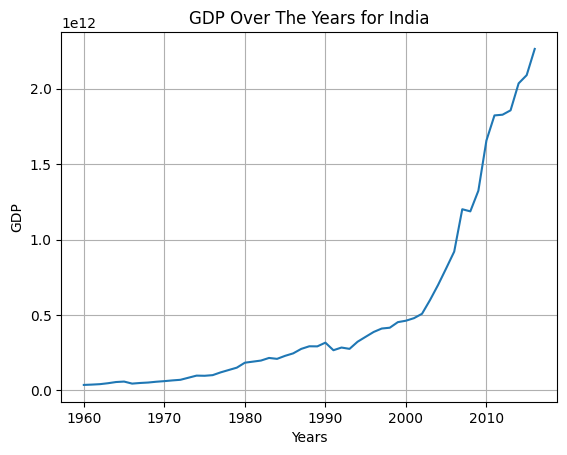

In [266]:
Plot_GDP_Of_Country('India')

### GDP GROWTH OF COUNTRY
To compute the **GDP GROWTH** of a nation for a specific year if available we find the rate of change of GDP value of the year as compared to the previous year.

In [267]:
def Find_GDP_Growth_Of_Country(country,yr):
    yr_gdp=0
    prev_yr_gdp=0

    for i in range(len(gdp_df)):
        if gdp_df.iloc[i]['Country Name']==country:
            if gdp_df.iloc[i]['Year']==yr:
                yr_gdp=gdp_df.iloc[i]['Value']
                break
            else:
                prev_yr_gdp=gdp_df.iloc[i]['Value']
    
    # print(yr_gdp,prev_yr_gdp)
    
    if prev_yr_gdp!=0:
        return round(((yr_gdp-prev_yr_gdp)/prev_yr_gdp)*100,3)
    return "Cannot be computed, please check year"

In [268]:
Find_GDP_Growth_Of_Country('Arab World',1970)

10.379

### GDP GROWTH ON ENTIRE DATASET
Let's assign a new column in the dataframe that holds GDP change of the nation for the year.

In [269]:
def Find_GDP_Growth():

    new_gdp_df = gdp_df.copy(deep=True)

    new_gdp_df['GDP Growth']=0

    for i in range(1,len(gdp_df)):
        if new_gdp_df.loc[i-1,'Country Name']==new_gdp_df.loc[i,'Country Name']:
            new_gdp_df.loc[i,'GDP Growth']=(new_gdp_df.loc[i,'Value']-new_gdp_df.loc[i-1,'Value'])/new_gdp_df.loc[i-1,'Value']
    
    return new_gdp_df


In [270]:
new_gdp_df=Find_GDP_Growth()

In [271]:
new_gdp_df.head()

,index,Country Name,Country Code,Year,Value,GDP Growth
0,0,Afghanistan,AFG,1960,5.377778e+08,0.000000
1,1,Afghanistan,AFG,1961,5.488889e+08,0.020661
2,2,Afghanistan,AFG,1962,5.466667e+08,-0.004049
3,3,Afghanistan,AFG,1963,7.511112e+08,0.373984
4,4,Afghanistan,AFG,1964,8.000000e+08,0.065089


Remember **iloc** in Pandas is used to slice a dataframe. Using **iloc** to fill up values fills values only in the slice of the dataframe picked and does not reflect in the
dataframe itself. Hence always use **loc** which accesses groups of rows & columns by labels to fill in values.

When copying dataframe always **Deep Copy** is done so that any change made in the copied dataframe does not affect the original dataframe.

#### FINDING MEAN GDP GROWTH OF EVERY COUNTRY

In [272]:
mean_gdp_growth=new_gdp_df.groupby(by=['Country Name'])['GDP Growth'].mean().sort_values(ascending=False)

Create a dataframe that has countries and their mean GDP growth over the years.

In [273]:
def Get_Countrywise_Mean_GDP_Growth_Rates():
    country_lst=[]
    mean_gdp_growth_rates=[]

    for country,gdp_rate in mean_gdp_growth.items():
        country_lst.append(country)
        mean_gdp_growth_rates.append(gdp_rate)
    
    return pd.DataFrame({'Country':country_lst,'Mean GDP Growth Rate':mean_gdp_growth_rates})

In [274]:
countrywise_mean_gdp_growthrate_df = Get_Countrywise_Mean_GDP_Growth_Rates()

In [275]:
countrywise_mean_gdp_growthrate_df.head()

,Country,Mean GDP Growth Rate
0,Equatorial Guinea,0.227385
1,Nauru,0.206523
2,Oman,0.176814
3,Qatar,0.173554
4,Switzerland,0.173241


In [276]:
countrywise_mean_gdp_growthrate_df[countrywise_mean_gdp_growthrate_df.Country.isin(['Afghanistan'])]

,Country,Mean GDP Growth Rate
21,Afghanistan,0.115426


#### INTERACTVE VISUALIZATION OF GDP GROWTH OF ANY NATION

In [277]:
import plotly.express as px

Visualising **GDP Growth** of Afghanistan

In [281]:
def Display_GDP_Growth_Of_Country(ctry):
    fig=px.line(data_frame=pd.DataFrame(new_gdp_df[new_gdp_df['Country Name'].isin([ctry])]),x='Year',y='GDP Growth',title='GDP Growth of '+ctry)
    fig.show()

In [285]:
Display_GDP_Growth_Of_Country('India')

#### COMPARE GDP GROWTH ACROSS DIFFERENT COUNTRIES
Display **GDP GROWTH** for different countries.

In [289]:
fig=px.line(data_frame=new_gdp_df,x='Year',y='GDP Growth',title='GDP Growth comparison across all countries',color='Country Name')
fig.show()

#### USING GRAPH OBJECTS IN PLOTLY TO CREATE COMPLEX PLOTS
**Graph Object** is a module under the **Plotly** library of Python which provides precise control as to how a visualization turn out to be. It let's one customise every individual element that make up such visualisation unlike **plotly.express** which even though has numerous attributes but is still limited.

**Components Of Graph Object**
1. Traces - Indicates how data looks like. It could be a line chart,bar plot,pie chart or in any other form. Each such trace is an instance of **Graph Object**.
2. Figure - It combines Traces & Layout to form the final visualisation.

**Graph Object** is ideal in situations that needs complex customisations.

In [290]:
import plotly.graph_objects as go

###

In [299]:
def Compare_GDP_Growth_Across_2_Countries(ctry1,ctry2):
    #create a figure to put the charts in
    fig = go.Figure()

    #Create the traces of charts
    trace_1 = go.Scatter(x=new_gdp_df[new_gdp_df['Country Name'].isin([ctry1])]['Year'],y=new_gdp_df[new_gdp_df['Country Name'].isin([ctry1])]['GDP Growth'],name=ctry1)
    trace_2 = go.Scatter(x=new_gdp_df[new_gdp_df['Country Name'].isin([ctry2])]['Year'],y=new_gdp_df[new_gdp_df['Country Name'].isin([ctry2])]['GDP Growth'],name=ctry2)

    #add both traces in figure
    fig.add_traces([trace_1,trace_2])

    #Customise chart layout
    fig.update_layout(title='GDP Growth Comparison of '+ctry1+' and '+ctry2,xaxis_title='Year',yaxis_title='GDP Growth',legend_title='Legend')

    # fig=px.line(data_frame=new_gdp_df,x='Year',y='GDP Growth',title='GDP Growth comparison across all countries',color=[ctry1,ctry2])
    fig.show()

In [307]:
Compare_GDP_Growth_Across_2_Countries('Nigeria','World')

#### COMPARISON OF GDP GROWTH ACROSS SEVERAL COUNTRIES

In [305]:
def Visualise_GDPGrowth_Across_Several_Countries(ctry_lst):
    fig=go.Figure()

    for ctry in ctry_lst:
        trace = go.Scatter(x=new_gdp_df[new_gdp_df['Country Name'].isin([ctry])]['Year'],y=new_gdp_df[new_gdp_df['Country Name'].isin([ctry])]['GDP Growth'],name=ctry)
        fig.add_trace(trace)
    
    fig.update_layout(title='GDP Growth Comparison Across Different Countries',xaxis_title='Year',yaxis_title='GDP Growth',legend_title='Legend')
    fig.show()

In [306]:
Visualise_GDPGrowth_Across_Several_Countries(['India','World','China','Australia'])